### Read Logistic_news data

In [36]:
import zipfile
import pandas as pd
import numpy as np
import pylab as plt
import os
import matplotlib.pyplot as plt
%matplotlib inline
path='./PS4_data/logistic_news/'
X_test=pd.read_csv(path+'X_test.csv',header=None, dtype=float).values
X_train=pd.read_csv(path+'X_train.csv',header=None,dtype=float).values
y_test=pd.read_csv(path+'y_test.csv',header=None,dtype=int).values
y_train=pd.read_csv(path+'y_train.csv',header=None,dtype=int).values

### Use GD to comput Beta

Each class c ∈ 1, 2, . . . , C has a parameter bc, and b ∈ RnC is the vector of concatenated parameters b = [b⊤1 ,b⊤2 ,...,b⊤C]⊤. Let X ∈ RN×n be the data matrix where each sample x⊤i is a row and N is the number of samples. The maximum likelihood approach seeks to find the parameter b which maximizes the likelihood of the classes given the input data and the model:

$
\begin{equation} 
minl(\beta)=−logP(y|X,\beta)(\text{logistic regression loss})=\sum_{i=1,...,N}\bigg({\beta^{T}x_{i}+ log\sum_{j=1,...,C}
exp{-\beta_{j}^{T}}x_{i}}\bigg)
\end{equation}
$

Notice that the gradient of  $l(\beta_{j}=k)$ is

$
\begin{equation} 
\bigtriangledown l(\beta_{j}=k)=\bigg(\sum_{i=1,...,N}1_{\beta_{i}=k}x_{i}-\frac{exp(-\beta_{k}^{T}x_{i})}{\sum_{j=1,...,C} exp{-\beta_{j}^{T}}x_{i}}x_{i}\bigg)
\end{equation}
$


In [170]:
##update beta
'''
def GD(X,y,beta,mu,gamma):
    C=len(np.unique(y_train))
    n=X.shape[1]#dimension of the data
    Gra_Lbeta=np.zeros((n,C))
    L_b1,L_b2=0,0
    for i in range(C):           
        index=np.where(y==i)[1]
        exp_bx=np.zeros(len(index))
        xexp_bx=np.zeros((len(index),X.shape[1]))
        for j in range(len(index)):
            ID=index[j]
            exp_bx[j]=np.exp((-1)*np.dot(beta[:,i],X[ID,:]))
        xx=(1-exp_bx/float(np.sum(exp_bx)))*X[index,:].T
        Gra_Lbeta[:,i]=1.0/n*np.sum(xx,1)###update Beta for each class
        ######calculate L(b)
        L_b1+=np.sum(np.dot(X[index,:],beta[:,i]))
        L_b2+=np.sum(np.log(np.sum(exp_bx)))
    ###Regularization term
    reg=mu*2*beta
    Lb=L_b1+L_b2+mu*np.linalg.norm(beta)
    beta=beta-gamma*(Gra_Lbeta+reg)
    return beta,Lb

def update_loop(X_train,y_train,gamma=0.01,iter=100):
    beta=np.random.rand(n,C)
    #beta=np.random.rand(X1.shape[1])
    Lb=np.zeros(iter)
    i=0
    mu=1/2001.0
    while i <= iter-1:
        beta,v=GD(X_train,y_train,beta,mu,0.01)
        Lb[i]=v
        i+=1
        print i,v
    return Lb
'''
#beta=np.random.rand(n,C)
#beta,Lb=GD(X_train,y_train,beta,0.01)

In [239]:
def fit_GD(X,y,b,mu,gamma):
    temp_o=np.ones([X.shape[0],1])
    X=np.c_[temp_o,X] # add one columns of all ones
    class_set=np.unique(y)
    c=len(class_set)
    n=X.shape[0] # sample number
    d=X.shape[1] # feature number
    #b=np.zeros((c,d)) 
    #print c, d
    A_choose=np.zeros((c,n)) # cxn
    for i in range(c):
        flag=(y==class_set[i])[0]
        A_choose[i,flag]=1
    term1=A_choose.dot(X)
    #print b.shape,X.transpose().shape
    temp1=np.exp(-1.0*(b.dot(X.transpose())))
    temp2=temp1.sum(axis=0)
    A_weighting=temp1/temp2
    term2=-1.0*(A_weighting.dot(X))
    
    term3=2*mu*b
    delta_b=(term1+term2)/float(n)+term3
    
    b=b-gamma*delta_b
    
    f_obj1=np.sum(np.sum(A_choose*(b.dot(X.transpose())),axis=1))
    f_obj2=np.sum(np.log(np.exp(-1.0*(b.dot(X.transpose()))).sum(axis=0)))
    #f_obj3=mu*np.sum((b*b).sum(axis=0))
    f_obj=(f_obj1+f_obj2)/float(n)#+f_obj3#unregularized regression loss
    
    return b, f_obj

def logistic_loss(X,y,b):
    temp_o=np.ones([X.shape[0],1])
    X=np.c_[temp_o,X] # add one columns of all ones
    class_set=np.unique(y)
    c=len(class_set)
    n=X.shape[0] # sample number
    d=X.shape[1] # feature number
    #b=np.zeros((c,d)) 
    #print c, d
    A_choose=np.zeros((c,n)) # cxn
    for i in range(c):
        flag=(y==class_set[i])[0]
        A_choose[i,flag]=1

    f_obj1=np.sum(np.sum(A_choose*(b.dot(X.transpose())),axis=1))
    f_obj2=np.sum(np.log(np.exp(-1.0*(b.dot(X.transpose()))).sum(axis=0)))
    #f_obj3=mu*np.sum((b*b).sum(axis=0))
    f_obj=(f_obj1+f_obj2)/float(n)#+f_obj3#unregularized regression loss
    return f_obj
    
def update_loop(X_train,y_train,X_test,y_test,mu=1,gamma=0.01,iter=100):
    X=X_train
    y=y_train
    temp_o=np.ones([X.shape[0],1])
    X1=np.c_[temp_o,X] # add one columns of all ones
    c=len(class_set)
    n=X1.shape[0] # sample number
    d=X1.shape[1] # feature number
    #b=np.zeros((c,d)) 
    #beta=np.random.rand((c,d)) 
    beta=np.random.rand(c,d)
    #beta=np.random.rand(X1.shape[1])
    train_loss=np.zeros(iter)
    test_loss=np.zeros(iter)
    i=0
    #mu=1/100.0
    while i <= iter-1:
        beta,v=fit_GD(X,y,beta,mu,0.01)
        train_loss[i]=v
        vv=logistic_loss(X_test,y_test,beta)
        test_loss[i]=vv
        #train_pre=predict(X_train,beta)
        #test_pre=predict(X_test,beta)
        ###performance of the solution on the testing set
        i+=1
        #print i,v,vv
    return train_loss,test_loss

### (a)
Find the value of μ that gives you (approximately) the best generalization performance (error on test set). You obtain this by solving the the above optimization problem for different values of μ, and then checking the performance of the solution on the testing set, using the unregularized logistic regression loss. Note that this is not a question about an optimization method.
What value do you get for the test loss after convergence?
### (b)
Plot the loss against iterations for both the test and training data using the value of μ from part (a).

In [241]:
x=update_loop(X_train,y_train,X_test,y_test,mu=1.0,gamma=0.1,iter=1000)

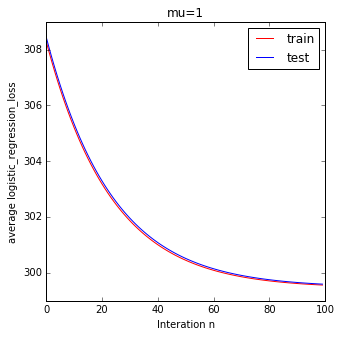

In [260]:
def plot_min(x,filename):
    plt.figure(figsize=(5,5))
    plt.plot(range(x[0].shape[0]),x[0],color='r',label='train')
    plt.plot(range(x[1].shape[0]),x[1],color='b',label='test')
    #plt.plot(range(b1.shape[0]),b1,color='r')
    plt.ylabel("average logistic_regression_loss") 
    plt.xlabel("Interation n") 
    plt.title("mu=1")
    plt.title(filename)
    plt.legend()
    plt.show()
plot_min([x[0][:100], x[1][:100]],'mu=1')
#plot_min(x_mu01,filename)
#plot_min(x_mu10,filename)

In [261]:
x_mu01=update_loop(X_train,y_train,X_test,y_test,mu=0.1,gamma=0.1,iter=1000)
x_mu10=update_loop(X_train,y_train,X_test,y_test,mu=10.0,gamma=0.1,iter=1000)

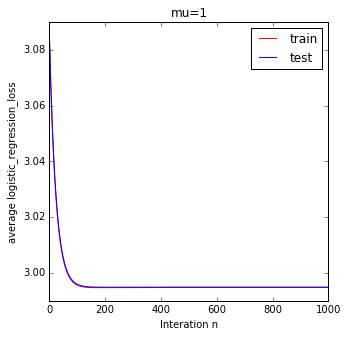

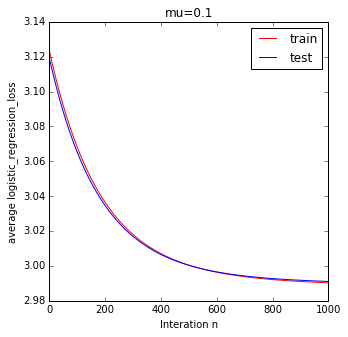

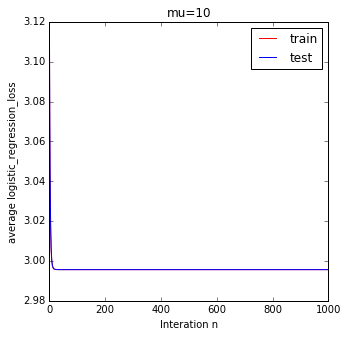

In [264]:
plot_min(x,'mu=1')
plot_min(x_mu01,'mu=0.1')
plot_min(x_mu10,'mu=10')

### (c)(d)
(c)How do the two algorithms differ in performance, and how does this change as you decrease μ? two algorithems :gradient and Nesterov’s accelerated gradient method
https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/
https://blogs.princeton.edu/imabandit/2015/06/30/revisiting-nesterovs-acceleration/

(d)Explain the difference in convergence in terms of the condition number of the problem (note that the loss is μ-strongly convex).

In [273]:
def fit_GD_Nesterov(X,y,b,mu,lamda_s,y_s,Beta):
    temp_o=np.ones([X.shape[0],1])
    X=np.c_[temp_o,X] # add one columns of all ones
    class_set=np.unique(y)
    c=len(class_set)
    n=X.shape[0] # sample number
    d=X.shape[1] # feature number
    #b=np.zeros((c,d)) 
    #print c, d
    A_choose=np.zeros((c,n)) # cxn
    for i in range(c):
        flag=(y==class_set[i])[0]
        A_choose[i,flag]=1
    term1=A_choose.dot(X)
    #print b.shape,X.transpose().shape
    temp1=np.exp(-1.0*(b.dot(X.transpose())))
    temp2=temp1.sum(axis=0)
    A_weighting=temp1/temp2
    term2=-1.0*(A_weighting.dot(X))
    
    term3=2*mu*b
    delta_b=(term1+term2)/float(n)+term3
    
    ###Nesterov_update
    lamda_s1=(1+np.sqrt(1+4*lamda_s**2))/2
    gamma_s=(1-lamda_s)/float(lamda_s1)
    
    y_s1=b-1.0/Beta*delta_b
    b=(1-gamma_s)*y_s1+gamma_s*y_s
    
    f_obj1=np.sum(np.sum(A_choose*(b.dot(X.transpose())),axis=1))
    f_obj2=np.sum(np.log(np.exp(-1.0*(b.dot(X.transpose()))).sum(axis=0)))
    #f_obj3=mu*np.sum((b*b).sum(axis=0))
    f_obj=(f_obj1+f_obj2)/float(n)#+f_obj3#unregularized regression loss
    
    return b,f_obj,lamda_s1,y_s1

    
def update_loop_Nesterov(X_train,y_train,X_test,y_test,mu=1,iter=100):
    X=X_train
    y=y_train
    temp_o=np.ones([X.shape[0],1])
    X1=np.c_[temp_o,X] # add one columns of all ones
    c=len(class_set)
    n=X1.shape[0] # sample number
    d=X1.shape[1] # feature number
    #b=np.zeros((c,d)) 
    #beta=np.random.rand((c,d)) 
    b=np.random.rand(c,d)
    #beta=np.random.rand(X1.shape[1])
    train_loss=np.zeros(iter)
    test_loss=np.zeros(iter)
    i=0
    #mu=1/100.0
    lamda_s=0
    y_s=b
    Beta=10
    while i <= iter-1:
        b,v,lamda_s,y_s=fit_GD_Nesterov(X,y,b,mu,lamda_s,y_s,Beta)
        train_loss[i]=v
        vv=logistic_loss(X_test,y_test,b)
        test_loss[i]=vv
        #train_pre=predict(X_train,beta)
        #test_pre=predict(X_test,beta)
        ###performance of the solution on the testing set
        i+=1
        print i,v,vv
    return train_loss,test_loss

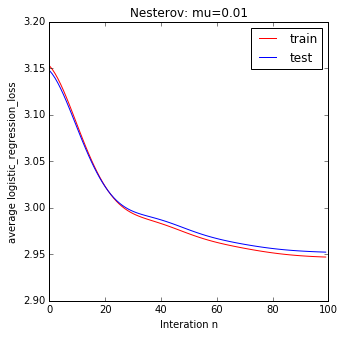

In [275]:
plot_min(x_Nesterov,'Nesterov: mu=0.01')


In [274]:
x_Nesterov=update_loop_Nesterov(X_train,y_train,X_test,y_test,mu=0.01,iter=100)

1 3.15268393312 3.14756968574
2 3.14896880113 3.14394568455
3 3.14435109178 3.13944324451
4 3.13894769483 3.13417765305
5 3.13287282501 3.12826168093
6 3.12624025925 3.12180771225
7 3.11916267662 3.11492704899
8 3.11175016058 3.10772840187
9 3.10410855082 3.10031623953
10 3.09633792651 3.092789272
11 3.08853134275 3.08523918763
12 3.08077386385 3.07774968626
13 3.07314189436 3.07039580924
14 3.06570278379 3.06324354249
15 3.05851466809 3.05634965603
16 3.05162650563 3.04976173806
17 3.04507826521 3.04351838186
18 3.03890122813 3.03764948758
19 3.03311837198 3.03217664711
20 3.02774481132 3.02711358751
21 3.02278827804 3.02246665569
22 3.01824963087 3.01823533401
23 3.01412338955 3.01441278224
24 3.01039829384 3.01098640581
25 3.00705789013 3.00793845309
26 3.00408115007 3.00524664563
27 3.00144312506 3.00288484496
28 2.99911563849 3.00082375762
29 2.99706801473 2.99903167668
30 2.99526783949 2.99747525441
31 2.99368174169 2.99612029544
32 2.99227618217 2.99493255556
33 2.99101823034 2.